In [1]:
import json

In [2]:
heilman_outfpath = 'article.heilman-sagae-2015.output'

In [3]:
import discoursegraphs as dg

In [4]:
hsg = dg.read_hs2015(heilman_outfpath)

In [5]:
dg.info(hsg)

Name: article.heilman-sagae-2015.output
Type: RSTHS2015DocumentGraph
Number of nodes: 319
Number of edges: 316
Average in degree:   0.9906
Average out degree:   0.9906 

Node statistics

number of nodes with layers
	rst - 319

number of nodes with attributes
	layers - 319
	label - 291
	rst:token - 260
	rst:text - 30
	rst:rel_type - 28
	rst:node_type - 28

Edge statistics

number of edges with layers
	rst - 316

number of edges with attributes
	layers - 316
	rst:rel_type - 56
	edge_type - 50

most common source edges
	rst:[u'and', u'Democratic', u'United', u'States', u'Senators', u'Bob', u'Menendez', u'of', u'New', u'Jersey', u',', u'Jeff', u'Merkley', u'of', u'Oregon', u',', u'and', u'Elizabeth', u'Warren', u'of', u'Massachusetts', u','] - 23
	rst:[u'to', u'be', u'seized', u'at', u'the', u'bank', u"'s", u'San', u'Francisco', u'headquarters', u'was', u'related', u'to', u'the', u'unauthorized', u'creation', u'of', u'accounts', u'by', u'Wells', u'Fargo', u'employees'] - 23
	rst:[u'The', u

In [6]:
with open(heilman_outfpath, 'r') as parsed_file:
    heilman_json = json.load(parsed_file)

In [7]:
heilman_json.keys()

[u'scored_rst_trees', u'edu_tokens']

In [8]:
for i, edu in enumerate(heilman_json['edu_tokens']):
    print i, u' '.join(edu)

0 California releases search warrant for Wells Fargo bank on identity theft
1 From Wikinews , the free news source
2 you can write !
3 Saturday , October 22 , 2016
4 The California Department of Justice on Wednesday released the warrant and affidavit of a criminal investigation of the Wells Fargo bank .
5 The State of California served the warrant on October 5
6 to search the San Francisco headquarters of Wells Fargo for felonious activities
7 related to identity theft .
8 The warrant said
9 property
10 to be seized at the bank 's San Francisco headquarters was related to the unauthorized creation of accounts by Wells Fargo employees
11 including the names of individuals for the accounts ;
12 account information and fees ;
13 the names of employees and their managers
14 who created accounts
15 without the consent of the Wells Fargo customers in question ;
16 and all communications
17 including emails
18 referencing the unauthorised accounts .
19 California Attorney General Kamala Harri

In [9]:
print type(heilman_json['scored_rst_trees'])
print len(heilman_json['scored_rst_trees'])

<type 'list'>
1


In [10]:
rst_tree = heilman_json['scored_rst_trees'][0]

In [11]:
rst_tree.keys()

[u'score', u'tree']

In [12]:
tree = rst_tree['tree']

In [13]:
tree

u'(ROOT (nucleus:span (nucleus:span (nucleus:span (nucleus:span (text 0)) (satellite:elaboration (nucleus:span (text 1)) (satellite:elaboration (text 2)))) (satellite:elaboration (text 3))) (satellite:elaboration (nucleus:span (nucleus:span (text 4)) (satellite:elaboration (nucleus:span (text 5)) (satellite:elaboration (nucleus:span (text 6)) (satellite:elaboration (text 7))))) (satellite:elaboration (satellite:attribution (text 8)) (nucleus:span (nucleus:span (text 9)) (satellite:elaboration (nucleus:span (nucleus:span (nucleus:same-unit (nucleus:span (text 10)) (satellite:elaboration (text 11))) (nucleus:same-unit (text 12))) (satellite:elaboration (nucleus:span (text 13)) (satellite:elaboration (nucleus:span (text 14)) (satellite:elaboration (nucleus:joint (text 15)) (nucleus:joint (nucleus:span (text 16)) (satellite:elaboration (nucleus:span (text 17)) (satellite:elaboration (text 18)))))))) (satellite:elaboration (nucleus:span (nucleus:span (nucleus:span (text 19)) (satellite:attr

In [14]:
import nltk

In [15]:
nltk_tree = nltk.ParentedTree.fromstring(tree)

In [16]:
# nltk_tree

In [17]:
#nltk_tree.productions()

In [18]:
nltk_tree.label()

u'ROOT'

In [19]:
for subtree in nltk_tree:
    print subtree.label()

nucleus:span
satellite:attribution


In [20]:
# def get_tree_structure(tree, indent=0):
#     if isinstance(tree, nltk.tree.ParentedTree):
#         ret_str = "{0} {1}\n".format(' '*indent, tree.label())
#         for subtree in tree:
#             ret_str += get_tree_structure(subtree, indent=indent+1)

#     else:
#         ret_str = "{0} {1}\n".format(' '*indent, tree)
#     return ret_str

In [21]:
# print get_tree_structure(nltk_tree)

In [22]:
# nltk_tree[1]

In [23]:
nucleus_span = nltk_tree[1][0]
# nucleus_span

In [24]:
# nucleus_span[0][0] = 'foo bar'

In [25]:
# nucleus_span

In [26]:
# nltk_tree[1]

In [27]:
%load_ext gvmagic

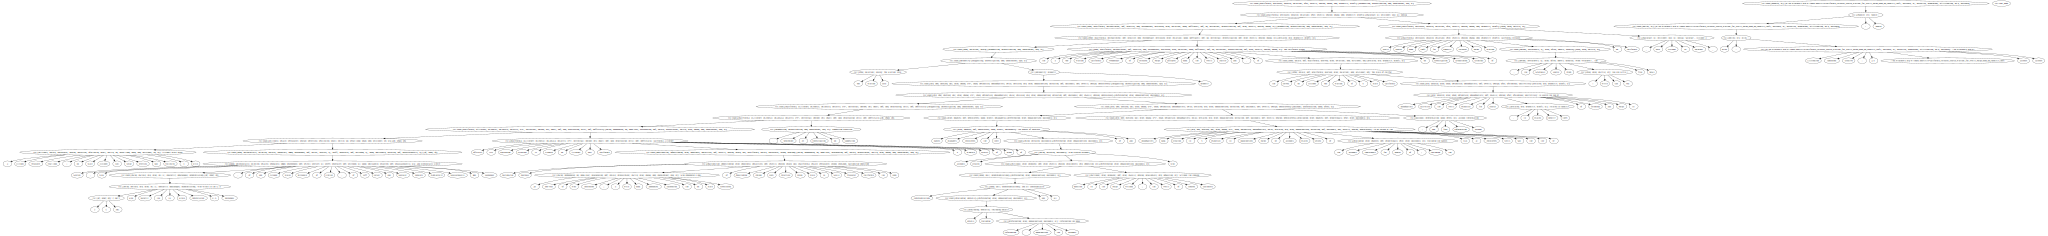

In [28]:
%dotstr dg.print_dot(hsg)